In [77]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [78]:
URL='https://assets.datacamp.com/production/repositories/1536/datasets/43d325fa67cde1d4d5de62adc108fceabaddf3cc/prices.csv'

In [79]:
import requests

r = requests.get(URL)

if r.status_code == 200:
    print(f'{r.status_code}')
else:
    print(f'Sorry, error: {r.status_code}')

200


In [80]:
prices = pd.read_csv(URL, parse_dates=['date'], infer_datetime_format=True)

In [81]:
prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84912 entries, 0 to 84911
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    84912 non-null  datetime64[ns]
 1   symbol  84912 non-null  object        
 2   close   84912 non-null  float64       
 3   volume  84912 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 2.6+ MB


In [82]:
prices.describe()

,close,volume
count,84912.000000,8.491200e+04
mean,42.962139,2.527185e+07
std,63.250840,3.179535e+07
min,1.590000,5.990000e+04
25%,15.440000,1.023690e+07
50%,29.969999,1.597010e+07
75%,47.459999,2.795918e+07
max,707.610001,8.596434e+08


In [83]:
prices.symbol.value_counts()

AAPL     1762
PFE      1762
KEY      1762
KO       1762
MRK      1762
MRO      1762
MSFT     1762
MU       1762
NFLX     1762
NVDA     1762
ORCL     1762
QCOM     1762
INTC     1762
RF       1762
SBUX     1762
T        1762
V        1762
VZ       1762
WFC      1762
XOM      1762
XRX      1762
YHOO     1762
ABT      1762
JPM      1762
HPQ      1762
DAL      1762
AIG      1762
AMAT     1762
ARNC     1762
BAC      1762
BSX      1762
C        1762
CHK      1762
CMCSA    1762
HBAN     1762
CSCO     1762
EBAY     1762
F        1762
FCX      1762
FITB     1762
FOXA     1762
FTR      1762
GE       1762
GILD     1762
GLW      1762
HAL      1762
GM       1540
FB       1008
KMI      1008
HPE       304
Name: symbol, dtype: int64

In [84]:
pivoted = prices.pivot(index="date", columns="symbol", values="close")

In [85]:
pivoted.isna().sum()

symbol
AAPL        0
ABT         0
AIG         0
AMAT        0
ARNC        0
BAC         0
BSX         0
C           0
CHK         0
CMCSA       0
CSCO        0
DAL         0
EBAY        0
F           0
FB        754
FCX         0
FITB        0
FOXA        0
FTR         0
GE          0
GILD        0
GLW         0
GM        222
HAL         0
HBAN        0
HPE      1458
HPQ         0
INTC        0
JPM         0
KEY         0
KMI       754
KO          0
MRK         0
MRO         0
MSFT        0
MU          0
NFLX        0
NVDA        0
ORCL        0
PFE         0
QCOM        0
RF          0
SBUX        0
T           0
V           0
VZ          0
WFC         0
XOM         0
XRX         0
YHOO        0
dtype: int64

<AxesSubplot:xlabel='date'>

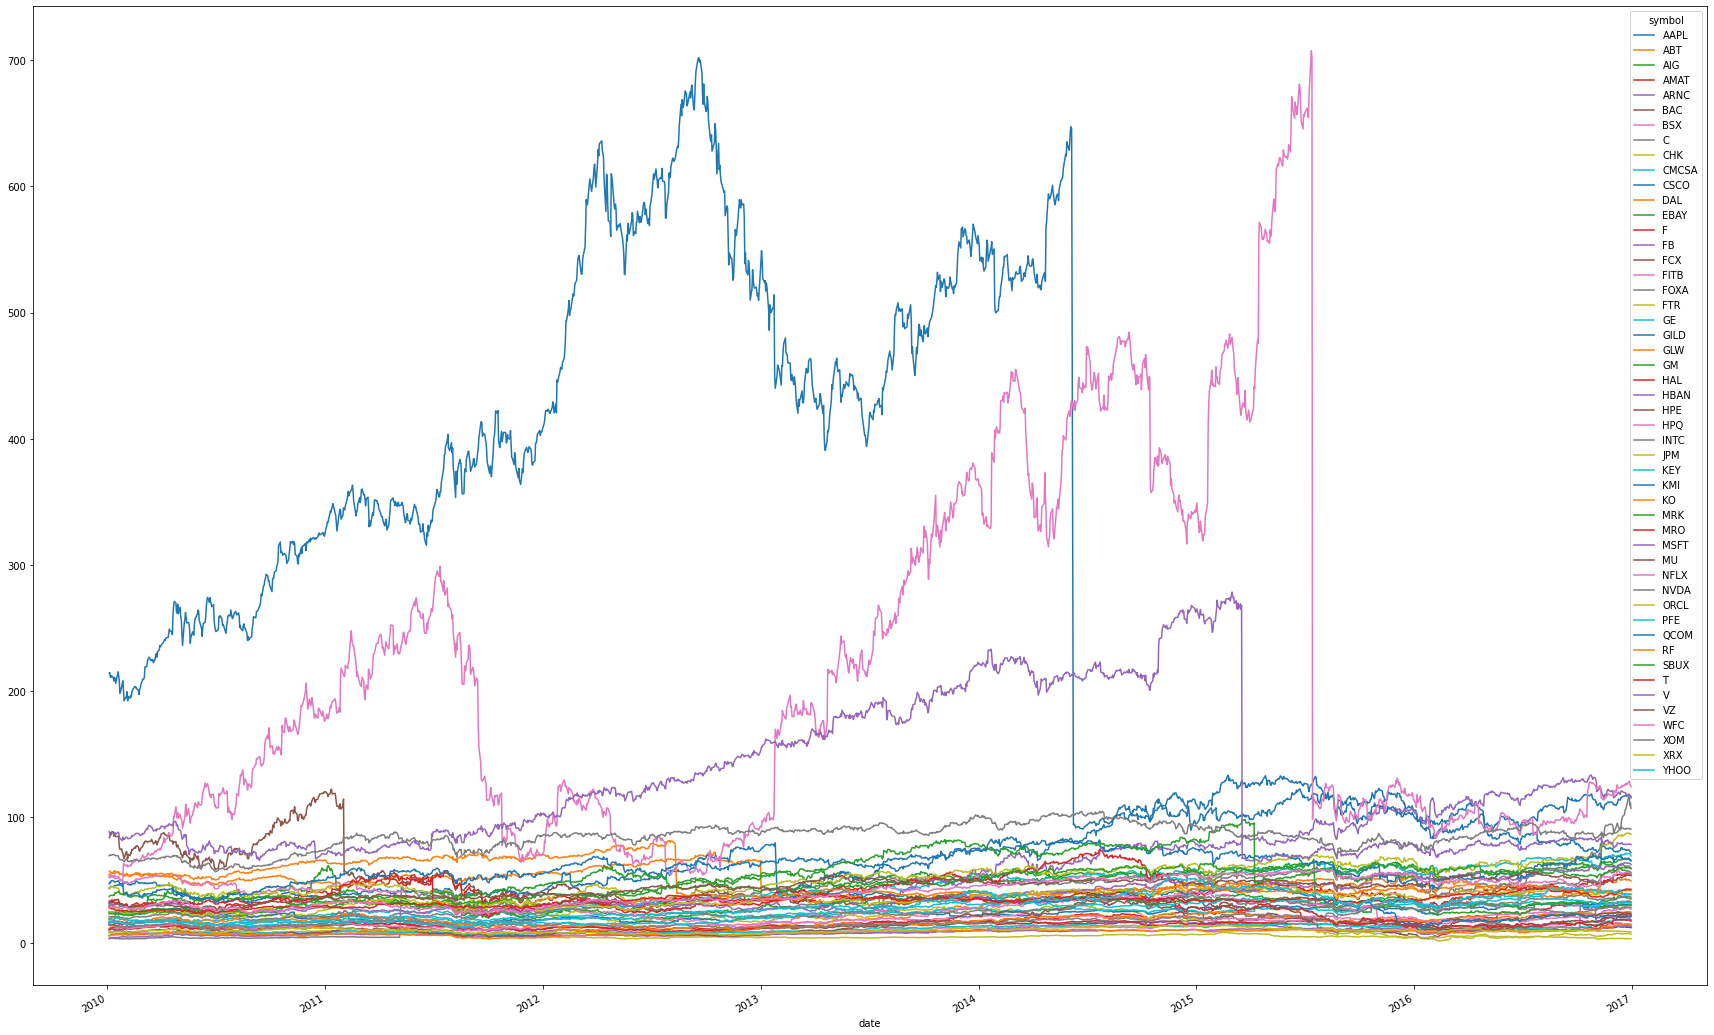

In [86]:
pivoted.plot(figsize=(30,20))

In [87]:
x = pivoted.describe().T

In [88]:
x['max'] 

symbol
AAPL     702.100021
ABT       72.129938
AIG       66.699997
AMAT      33.330002
ARNC      31.779999
BAC       23.160000
BSX       24.480000
C         61.090000
CHK       35.610003
CMCSA     71.019997
CSCO      31.870001
DAL       52.259998
EBAY      66.289998
F         18.790001
FB       133.279999
FCX      121.839996
FITB      27.790001
FOXA      39.009998
FTR        9.770000
GE        32.930000
GILD     122.209999
GLW       25.000000
GM        41.529999
HAL       74.019997
HBAN      13.510000
HPE       24.680000
HPQ       54.519998
INTC      38.099998
JPM       87.129997
KEY       18.540001
KMI       44.570000
KO        81.120003
MRK       64.959999
MRO       54.170125
MSFT      63.619999
MU        36.490002
NFLX     707.610001
NVDA     117.320000
ORCL      46.230000
PFE       37.310001
QCOM      81.599998
RF        14.640000
SBUX      97.919998
T         43.470001
V        278.290009
VZ        56.529999
WFC       58.520000
XOM      104.379997
XRX       14.320000
YHOO      52.

In [89]:
subframe1 = pivoted[['EBAY', 'NVDA', 'YHOO']]
subframe2 = pivoted[['GM', 'FB', 'KMI']]
subframe3 = pivoted[['EBAY', 'NVDA', 'YHOO', 'AAPL']]
subframe4 = pivoted[['EBAY', 'NVDA', 'YHOO', 'AAPL', 'NFLX', 'ORCL', 'SBUX', 'V', 'MSFT', 'CSCO']]

<AxesSubplot:xlabel='EBAY', ylabel='YHOO'>

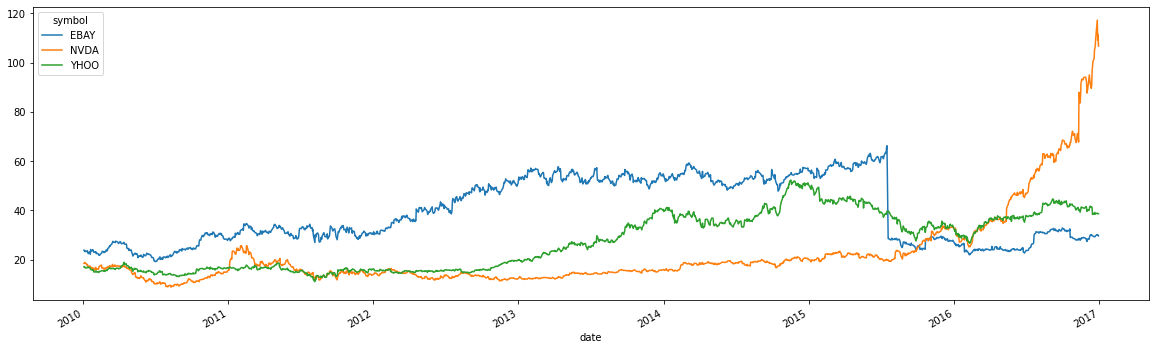

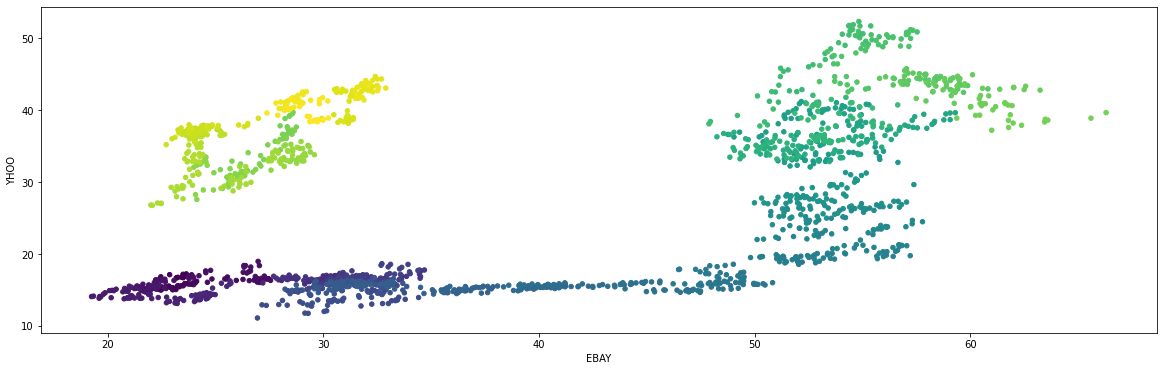

In [90]:
subframe1.plot(figsize=(20,6))
subframe1.plot.scatter('EBAY', 'YHOO',c=subframe1.index, cmap=plt.cm.viridis, colorbar=False,figsize=(20,6))

#### Attempt to predict the value of the Apple stock price using the values of NVidia, Ebay, and Yahoo.

In [91]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

# Use stock symbols to extract training data
X = pivoted[['EBAY', 'NVDA', 'YHOO']]
y = pivoted[['AAPL']]

# Fit and score the model with cross-validation
scores = cross_val_score(Ridge(), X, y, cv=3)
print(scores)

[  -0.55495235   -0.9912733  -322.41700994]


Terrible results from raw data

In [92]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Split our data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False)

# Fit our model and generate predictions
model = Ridge()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
score = r2_score(y_test, predictions)

print(score)

-388.35570164334194


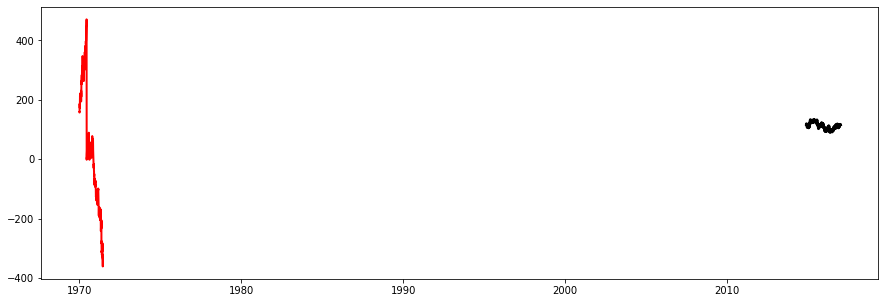

In [93]:
# Visualize our predictions along with the "true" values, and print the score

fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(y_test, color='k', lw=3)
ax.plot(predictions, color='r', lw=2)
plt.show()

#### Visualize messy data

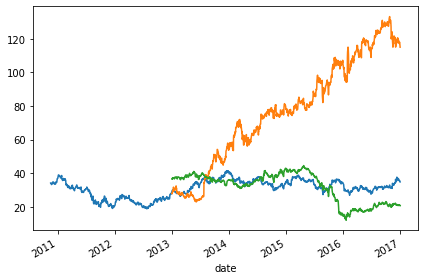

symbol
GM     222
FB     754
KMI    754
dtype: int64


In [94]:
# Visualize the dataset
subframe2.plot(legend=False)
plt.tight_layout()
plt.show()

# Count the missing values of each time series
missing_values = subframe2.isnull().sum()
print(missing_values)

#### Imputing missing values

In [95]:
# Create a function we'll use to interpolate and plot
def interpolate_and_plot(prices, interpolation):

    # Create a boolean mask for missing values
    missing_values = prices.isna()

    # Interpolate the missing values
    prices_interp = prices.interpolate(interpolation)

    # Plot the results, highlighting the interpolated values in black
    fig, ax = plt.subplots(figsize=(10, 5))
    prices_interp.plot(color='k', alpha=.6, ax=ax, legend=False)
    
    # Now plot the interpolated values on top in red
    prices_interp[missing_values].plot(ax=ax, color='r', lw=3, legend=False)
    plt.show()

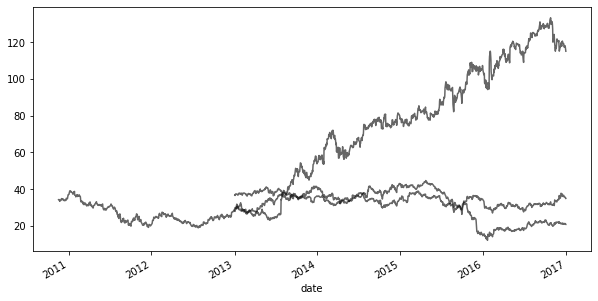

In [96]:
# Interpolate using the latest non-missing value
interpolation_type = 'linear'
interpolate_and_plot(subframe2, interpolation_type)

#### define a function that calculates the percent change of the latest data point from the mean of a window of previous data points. This function will help you calculate the percent change over a rolling window.

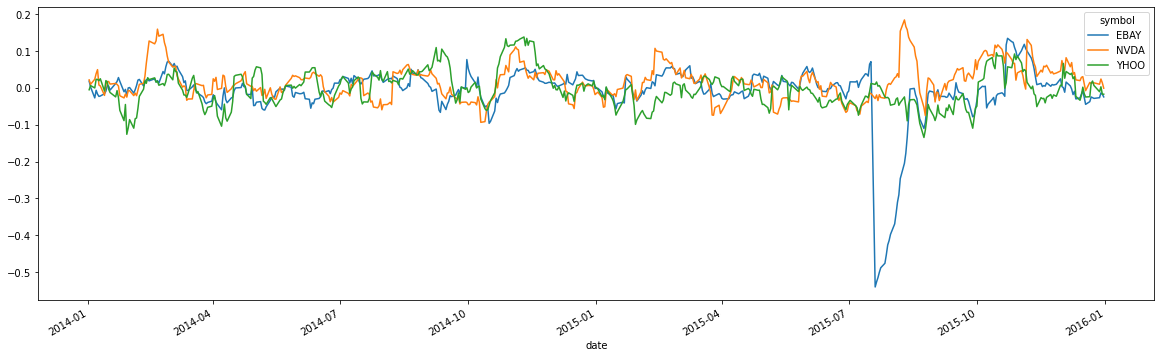

In [97]:
# Your custom function
def percent_change(series):
    '''function to calculate the % difference between the last value and
    the mean of earlier values in a time series'''
    # Collect all *but* the last value of this window, then the final value
    previous_values = series[:-1]
    last_value = series[-1]

    # Calculate the % difference between the last value and the mean of earlier values
    percent_change = (last_value - np.mean(previous_values)) / np.mean(previous_values)
    return percent_change

# Apply your custom function and plot
prices_perc = subframe1.rolling(20).aggregate(percent_change)
prices_perc.loc["2014":"2015"].plot(figsize=(20,6))
plt.show()

#### a function that replaces outlier data points with the median value from the entire time series.

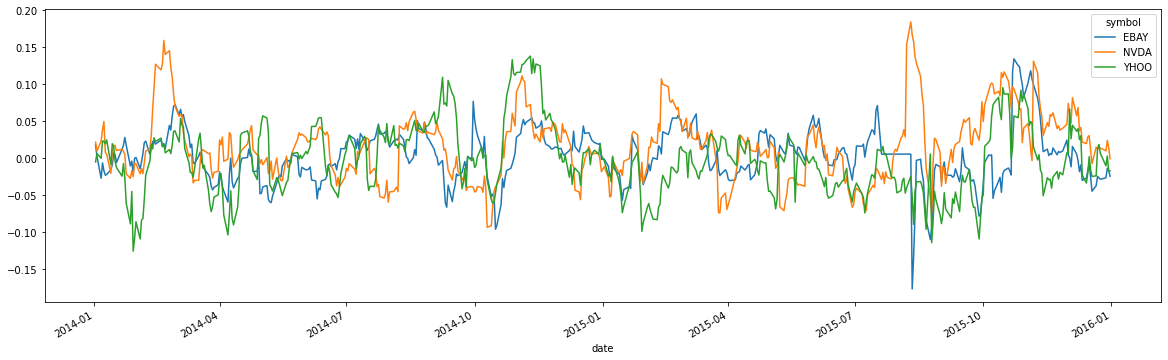

In [98]:
def replace_outliers(series):
    # Calculate the absolute difference of each timepoint from the series mean
    absolute_differences_from_mean = np.abs(series - np.mean(series))
    
    # Calculate a mask for the differences that are > 3 standard deviations from zero
    this_mask = absolute_differences_from_mean > (np.std(series) * 3)
    
    # Replace these values with the median accross the data
    series[this_mask] = np.nanmedian(series)
    return series

# Apply your preprocessing function to the timeseries and plot the results
prices_perc = prices_perc.apply(replace_outliers)
prices_perc.loc["2014":"2015"].plot(figsize=(20,6))
plt.show()

#### Engineering multiple rolling features at once

In [99]:
price_nvda = pivoted[['NVDA']]

<AxesSubplot:xlabel='date'>

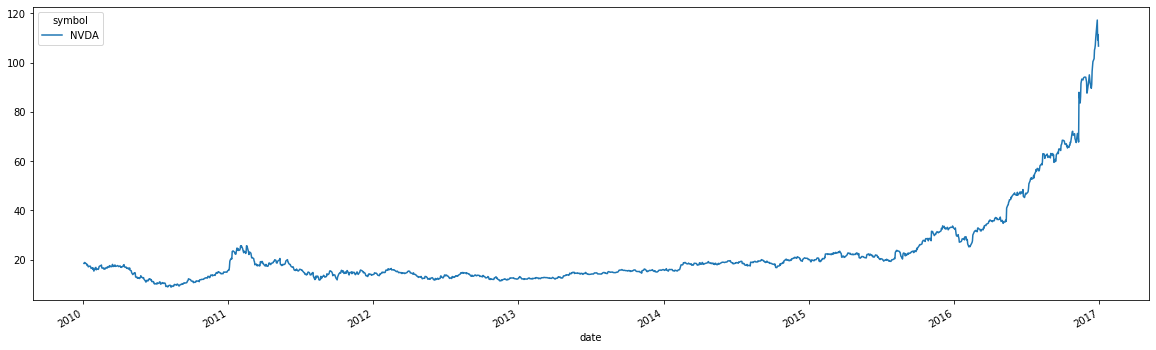

In [100]:
# view original time series for nvidia
price_nvda.plot(figsize=(20,6))

In [101]:
prices_perc = price_nvda.rolling(20).aggregate(percent_change)

<AxesSubplot:xlabel='date'>

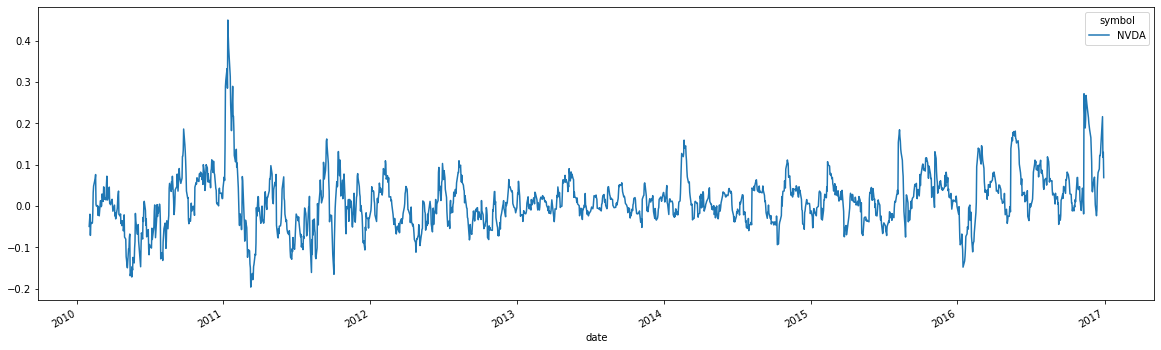

In [102]:
prices_perc.plot(figsize=(20,6))

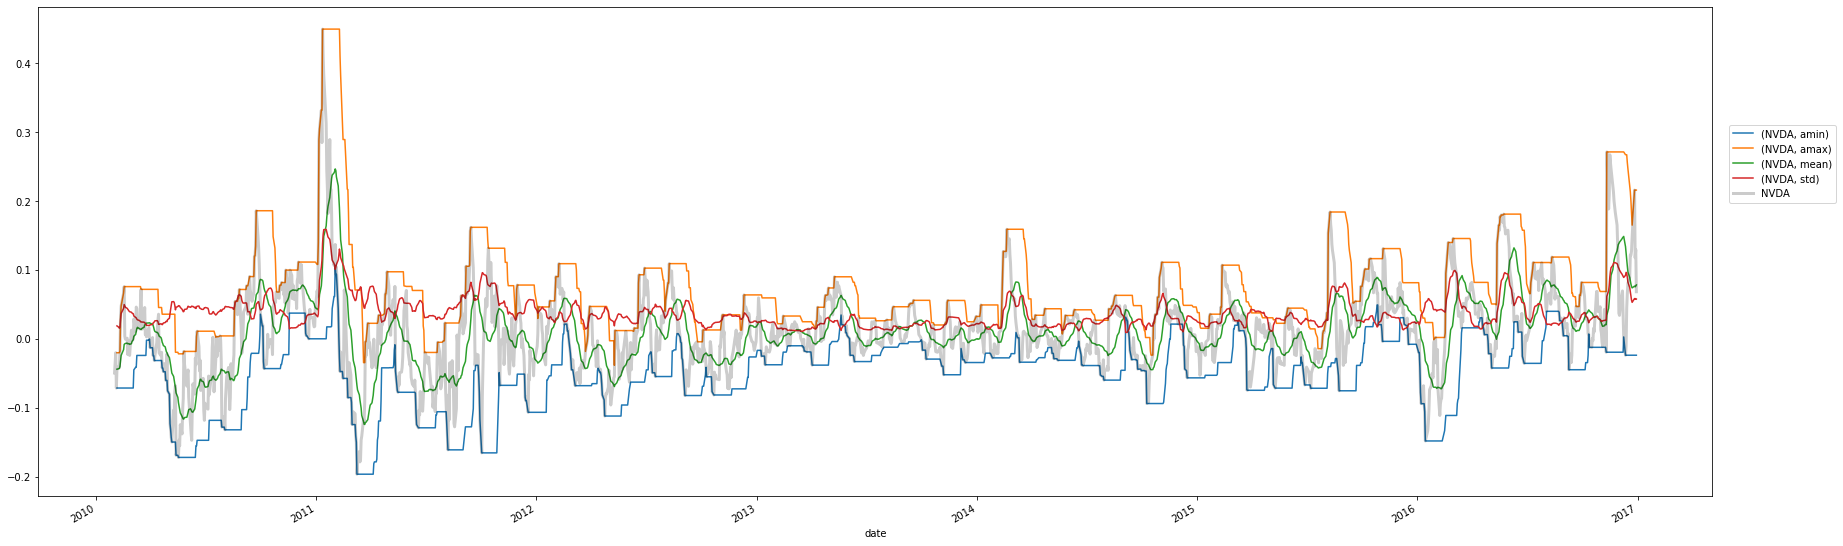

In [103]:
# Define a rolling window with Pandas, excluding the right-most datapoint of the window
prices_perc_rolling = prices_perc.rolling(20, min_periods=5, closed='right')

# Define the features you'll calculate for each window
features_to_calculate = [np.min, np.max, np.mean, np.std]

# Calculate these features for your rolling window object
features = prices_perc_rolling.aggregate(features_to_calculate)

# Plot the results
ax = features.plot(figsize=(30,10)) # can use features.loc[:"2011-01"].plot()
prices_perc.plot(ax=ax, color='k', alpha=.2, lw=3) # prices_perc.loc[:""plot(ax=ax, color='k', alpha=.2, lw=3)
ax.legend(loc=(1.01, .6))
plt.show()

#### Pre-choose arguments of a function so that you can pre-configure how it runs (partial)  
#### Use this to calculate several percentiles of your data using the same percentile() function in numpy

In [104]:
# Import partial from functools
from functools import partial
percentiles = [1, 10, 25, 50, 75, 90, 99]

# Use a list comprehension to create a partial function for each quantile
percentile_functions = [partial(np.percentile, q=percentile) for percentile in percentiles]

# Calculate each of these quantiles on the data using a rolling window
prices_perc_rolling = prices_perc.rolling(20, min_periods=5, closed='right')
features_percentiles = prices_perc_rolling.aggregate(percentile_functions)

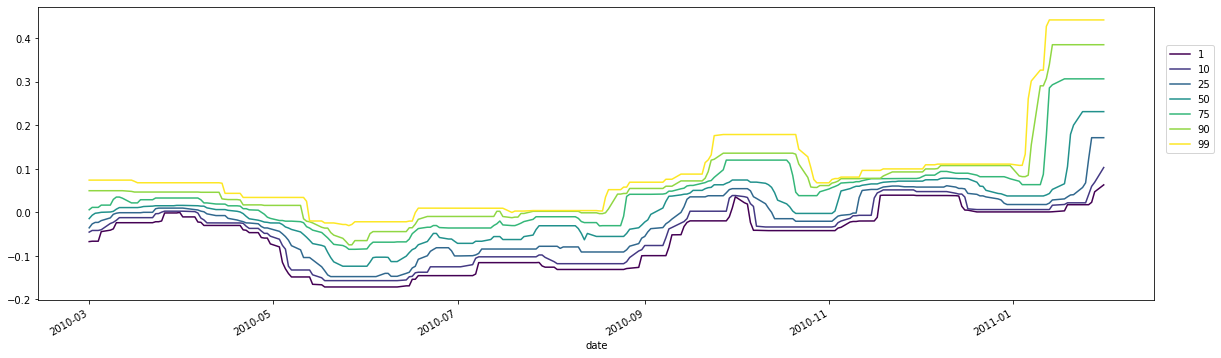

In [105]:
# rename columns
features_percentiles.columns = [1, 10, 25, 50, 75, 90, 99]

# Plot a subset of the result
ax = features_percentiles.loc[:"2011-01"].plot(cmap=plt.cm.viridis, figsize=(20,6))
ax.legend(percentiles, loc=(1.01, .5))
plt.show()

#### extract these date/time based features

In [106]:
price_ebay = pivoted[['EBAY']]

<AxesSubplot:xlabel='date'>

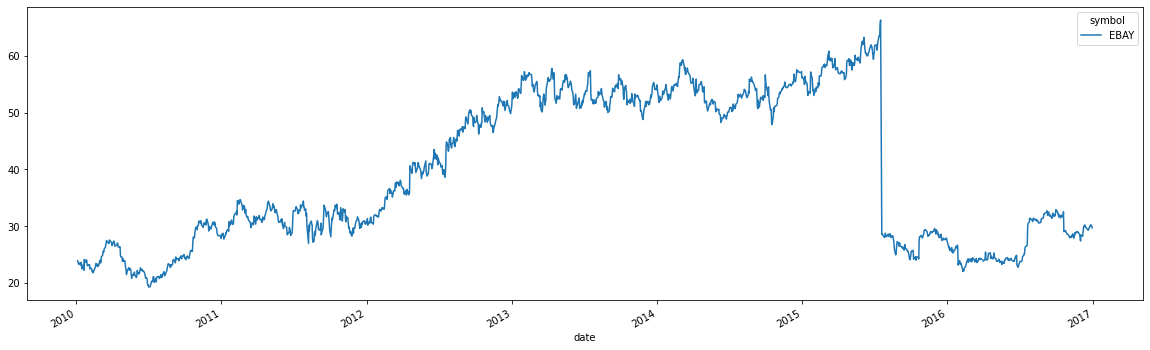

In [107]:
price_ebay.plot(figsize=(20,6))

<AxesSubplot:xlabel='date'>

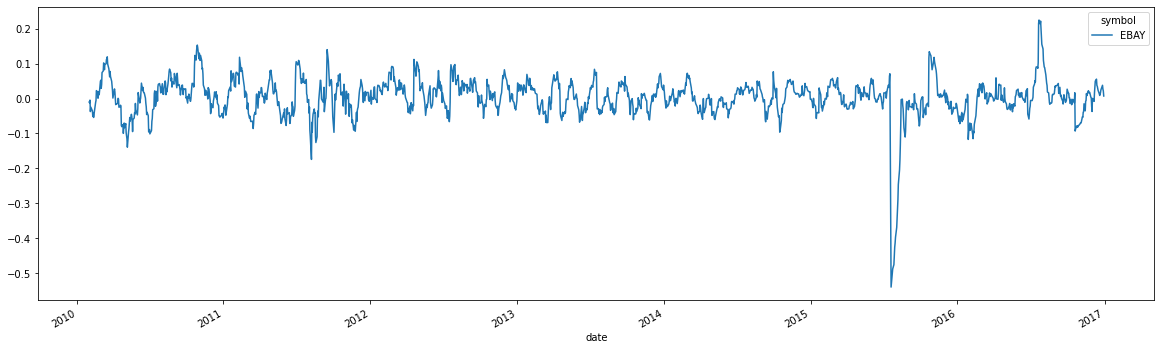

In [108]:
prices_perc = price_ebay.rolling(20).aggregate(percent_change)
prices_perc.plot(figsize=(20,6))

In [109]:
# Extract date features from the data, add them as columns
prices_perc['day_of_week'] = prices_perc.index.dayofweek
prices_perc['week_of_year'] = prices_perc.index.isocalendar().week # weekofyear deprecated
prices_perc['month_of_year'] = prices_perc.index.month

# Print prices_perc
print(prices_perc)

symbol          EBAY  day_of_week  week_of_year  month_of_year
date                                                          
2010-01-04       NaN            0             1              1
2010-01-05       NaN            1             1              1
2010-01-06       NaN            2             1              1
2010-01-07       NaN            3             1              1
2010-01-08       NaN            4             1              1
...              ...          ...           ...            ...
2016-12-23  0.024842            4            51             12
2016-12-27  0.038030            1            52             12
2016-12-28  0.026925            2            52             12
2016-12-29  0.021850            3            52             12
2016-12-30  0.007285            4            52             12

[1762 rows x 4 columns]


## Validating and Inspecting Time Series Models

### Creating features from the past

The past is useful 
- Timeseries data almost always have information that is shared between time points 
- Information in the past can help predict what happens in the future 
- Often the features best suited to predict a timeseries are previous values of the same timeseries.

A note on smoothness and auto-correlation 
- A common question to ask of a timeseries:how smooth is the data.
- AKA,how correlated is a timepoint with its neighboring timepoints(called autocorrelation).
- The amount of auto-correlation in data will impact your models.


Lets see how we could build a model that uses values in the past as input features.

We can use this to assess hoe auto-correlated our signal is.



#### Creating time shifted/lagged features

In machine learning for time series, it's common to use information about previous time points to predict a subsequent time point.

In this exercise, you'll "shift" your raw data and visualize the results. You'll use the percent change time series that you calculated in the previous chapter, this time with a very short window. A short window is important because, in a real-world scenario, you want to predict the day-to-day fluctuations of a time series, not its change over a longer window of time.

<AxesSubplot:xlabel='date'>

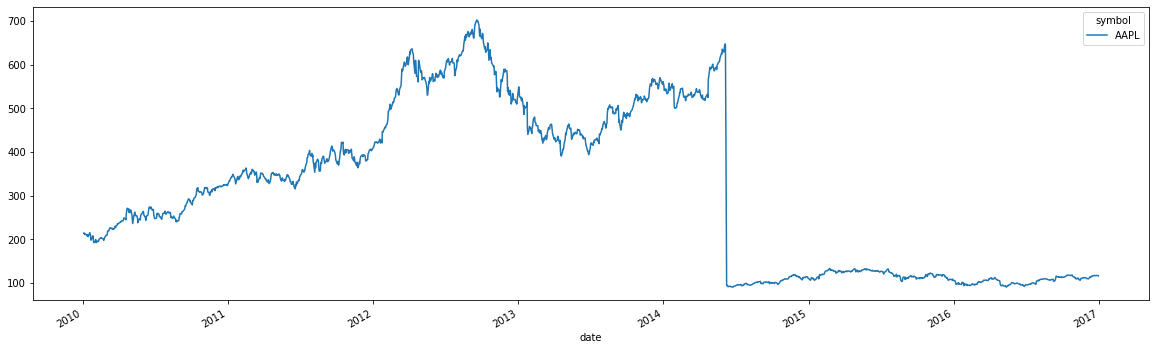

In [110]:
price_aapl = pivoted[["AAPL"]]
price_aapl.plot(figsize=(20,6))

<AxesSubplot:xlabel='date'>

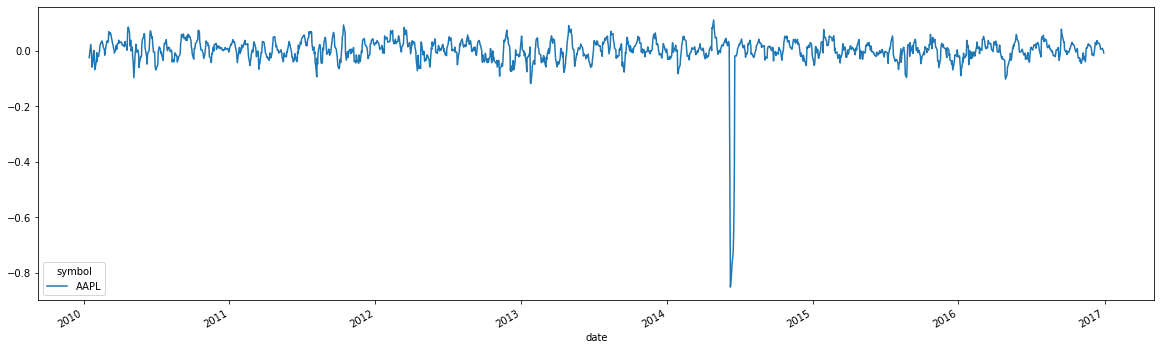

In [111]:
# create percentage change timeseries using rolling window and custom function
prices_perc = price_aapl.rolling(10).aggregate(percent_change)
prices_perc.plot(figsize=(20,6))

In [112]:
# These are the "time lags"
shifts = np.arange(1, 11).astype(int)

# Use a dictionary comprehension to create name: value pairs, one pair per shift
shifted_data = {"lag_{}_day".format(day_shift): prices_perc.shift(day_shift) for day_shift in shifts}

In [113]:
# # Convert into a DataFrame for subsequent use
prices_perc_shifted = pd.DataFrame(prices_perc.index)
prices_perc_shifted.set_index('date', inplace=True)

for day in shifted_data.keys():
    temp_df = pd.DataFrame.from_dict(shifted_data[day])
    temp_val = temp_df['AAPL'].values
    prices_perc_shifted[day] = temp_val
# prices_perc_shifted

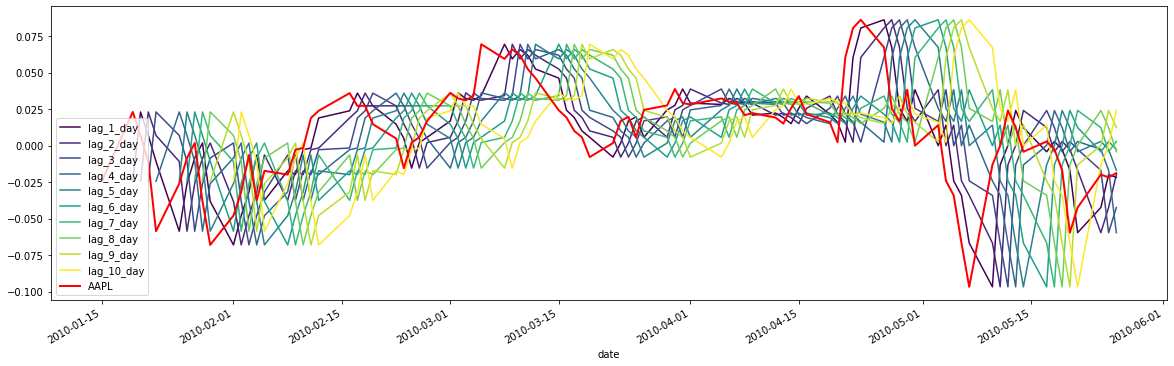

In [114]:
# # Plot the first 100 samples of each
ax = prices_perc_shifted.iloc[:100].plot(cmap=plt.cm.viridis, figsize=(20,6))
prices_perc.iloc[:100].plot(color='r', lw=2, ax=ax)
ax.legend(loc='best')
plt.show()

#### Auto-regressive models

Now that you've created time-shifted versions of a single time series, you can fit an auto-regressive model. This is a regression model where the input features are time-shifted versions of the output time series data. You are using previous values of a timeseries to predict current values of the same timeseries (thus, it is auto-regressive).

By investigating the coefficients of this model, you can explore any repetitive patterns that exist in a timeseries, and get an idea for how far in the past a data point is predictive of the future.

In [115]:
# remove rows with just NaN values
prices_perc_shifted.drop(prices_perc_shifted.index[0:20], inplace=True)
prices_perc.drop(prices_perc.index[0:20], inplace=True)

# Replace missing values with the median for each column
X = prices_perc_shifted.fillna(np.nanmedian(prices_perc_shifted))
y = prices_perc.fillna(np.nanmedian(prices_perc))

# Fit the model
model = Ridge()
model.fit(X, y)

Ridge()

Now that you've fit the model, let's visualize its coefficients. This is an important part of machine learning because it gives you an idea for how the different features of a model affect the outcome.

#### Visualize regression coefficients

In [116]:
def visualize_coefficients(coefs, names, ax):
    # Make a bar plot for the coefficients, including their names on the x-axis
    ax.bar(names, coefs)
    ax.set(xlabel='Coefficient name', ylabel='Coefficient value')
    
    # Set formatting so it looks nice
    plt.setp(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
    return ax

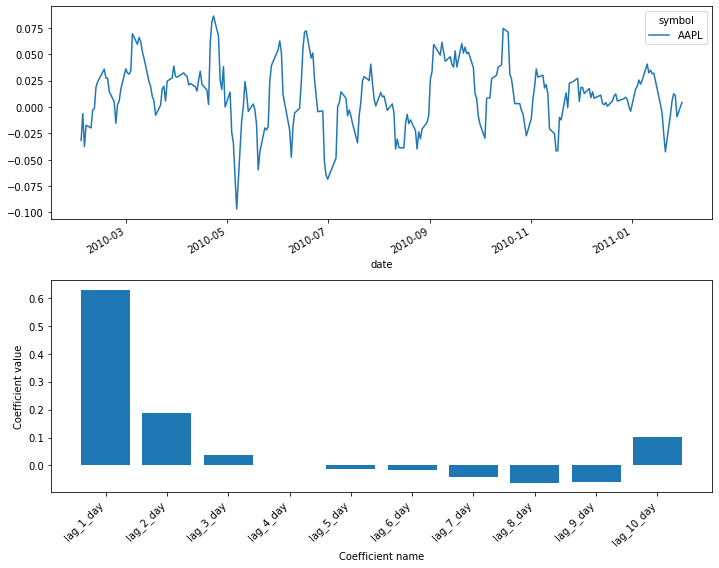

In [117]:
# Visualize the output data up to "2011-01"
fig, axs = plt.subplots(2, 1, figsize=(10, 8))
y.loc[:'2011-01'].plot(ax=axs[0])

# Run the function to visualize model's coefficients
visualize_coefficients(model.coef_.flatten(), prices_perc_shifted.columns, ax=axs[1])
plt.tight_layout()
plt.show()

When you use time-lagged features on the raw data, you see that the highest coefficient by far is the first one. This means that the N-1th time point is useful in predicting the Nth timepoint, but no other points are useful

#### Auto-regression with a smoother time series

Now, let's re-run the same procedure using a smoother signal. You'll use the same percent change algorithm as before, but this time use a much larger window (40 instead of 20). As the window grows, the difference between neighboring timepoints gets smaller, resulting in a smoother signal. 

In [118]:
prices_perc = price_aapl.rolling(60).aggregate(percent_change)

# These are the "time lags"
shifts = np.arange(1, 11).astype(int)

# Use a dictionary comprehension to create name: value pairs, one pair per shift
shifted_data = {"lag_{}_day".format(day_shift): prices_perc.shift(day_shift) for day_shift in shifts}

# Convert into a DataFrame for subsequent use
prices_perc_shifted = pd.DataFrame(prices_perc.index)
prices_perc_shifted.set_index('date', inplace=True)

for day in shifted_data.keys():
    temp_df = pd.DataFrame.from_dict(shifted_data[day])
    temp_val = temp_df['AAPL'].values
    prices_perc_shifted[day] = temp_val

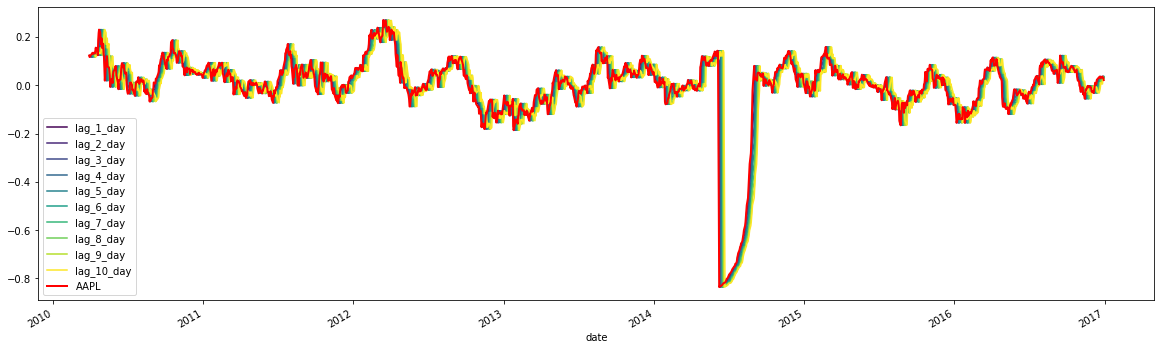

In [119]:
# Plot all samples of each
ax = prices_perc_shifted.plot(cmap=plt.cm.viridis, figsize=(20,6))
prices_perc.plot(color='r', lw=2, ax=ax)
ax.legend(loc='best')
plt.show()

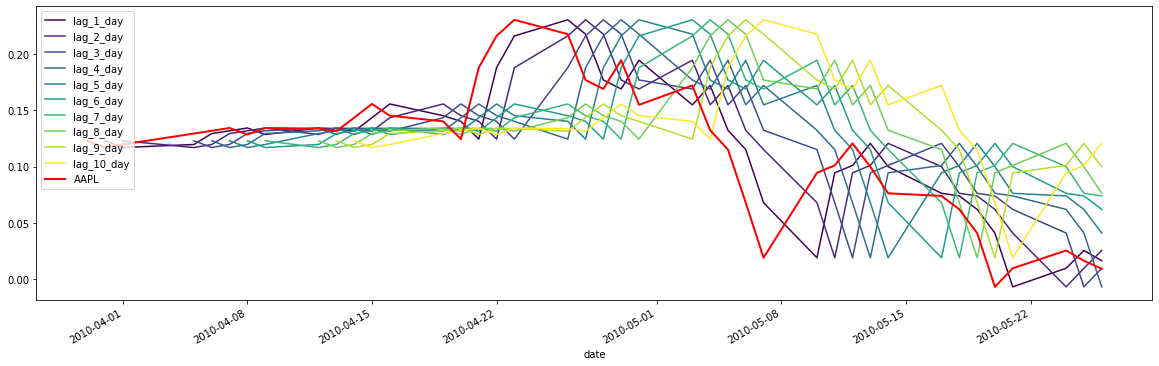

In [120]:
# # Plot the first 100 samples of each
ax = prices_perc_shifted.iloc[:100].plot(cmap=plt.cm.viridis, figsize=(20,6))
prices_perc.iloc[:100].plot(color='r', lw=2, ax=ax)
ax.legend(loc='best')
plt.show()

In [121]:
# remove rows with just NaN values
# prices_perc_shifted.drop(prices_perc_shifted.index[0:20], inplace=True)
# prices_perc.drop(prices_perc.index[0:20], inplace=True)

# Replace missing values with the median for each column
X = prices_perc_shifted.fillna(np.nanmedian(prices_perc_shifted))
y = prices_perc.fillna(np.nanmedian(prices_perc))

# Fit the model
model = Ridge()
model.fit(X, y)

Ridge()

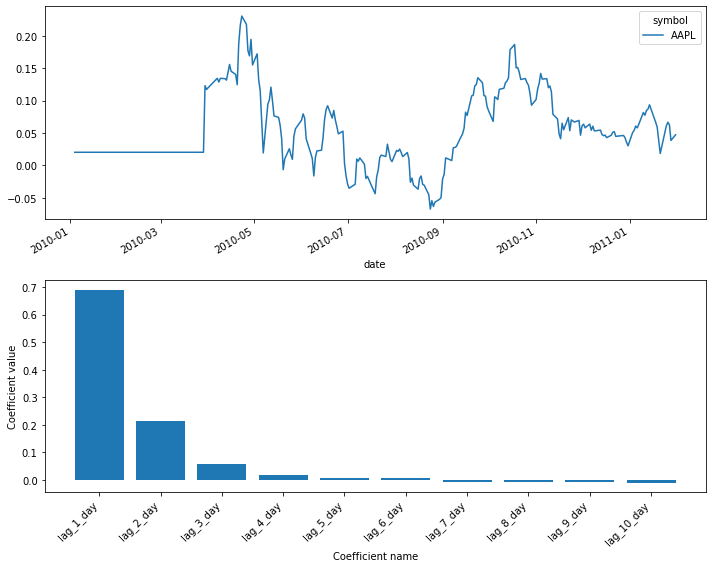

In [122]:
# Visualize the output data up to "2011-01"
fig, axs = plt.subplots(2, 1, figsize=(10, 8))
y.loc[:'2011-01'].plot(ax=axs[0])

# Run the function to visualize model's coefficients
visualize_coefficients(model.coef_.flatten(), prices_perc_shifted.columns, ax=axs[1])
plt.tight_layout()
plt.show()

As you can see here, by transforming your data with a larger window, you've also changed the relationship between each timepoint and the ones that come just before it. This model's coefficients gradually go down to zero, which means that the signal itself is smoother over time. Be careful when you see something like this, as it means your data is not independent and identically distributed

### Cross-validating time series data

#### Cross validation with shuffling

As you'll recall, cross-validation is the process of splitting your data into training and test sets multiple times
In this exercise, you'll perform a traditional ShuffleSplit cross-validation on the company value data from earlier. Later we'll cover what changes need to be made for time series data.

In [123]:
# IF USING OTHER COMPANIES TO PREDICT PERC CHANGE OF AAPL
subframe4_perc = subframe4.rolling(20).aggregate(percent_change)
subframe4_perc.dropna(axis = 0, inplace=True)

In [126]:
X = (subframe4_perc
     .drop('AAPL', axis=1)
     .to_numpy())

y = (subframe4_perc['AAPL']
     .to_numpy()
     .reshape(-1,1))

In [127]:
from sklearn.model_selection import ShuffleSplit
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

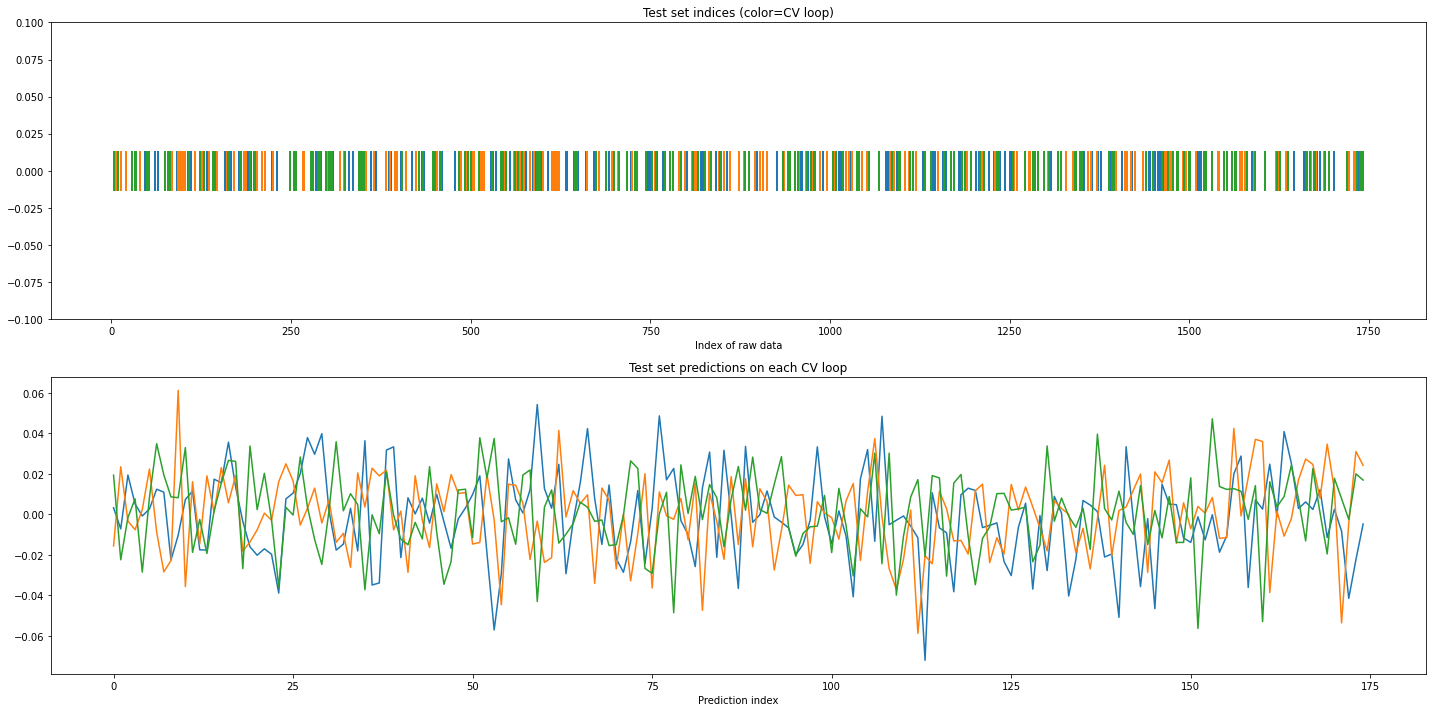

In [134]:
CV=3

# Create the cross-validation and model object
cv = ShuffleSplit(n_splits=CV, random_state=1)
model = LinearRegression()

# define figure, axes, subplots and figure size
fig, axs = plt.subplots(2, 1, figsize=(20,10))

# Iterate through CV splits
for tr, tt in cv.split(X, y):
    
    # Fit the model on training data
    model.fit(X[tr], y[tr])
#     model.score(X[tt], y[tt])

    # Plot the indices chosen for validation on each loop
    axs[0].scatter(tt, [0] * len(tt), marker='_', s=2, lw=40)

    # Plot the model predictions on each iteration
    axs[1].plot(model.predict(X[tt]))
    
axs[0].set(ylim=[-.1, .1], title='Test set indices (color=CV loop)',xlabel='Index of raw data')
axs[1].set(title='Test set predictions on each CV loop',xlabel='Prediction index')

plt.tight_layout()
plt.show()

In [ ]:
fig, axs = plt.subplots(2, 1)
# Plot the indices chosen for validation on each loop
axs[0].scatter(tt, [0] * len(tt), marker='_', s=2, lw=40)
axs[0].set(ylim=[-.1, .1], title='Test set indices (color=CV loop)',
           xlabel='Index of raw data')

# Plot the model predictions on each iteration
axs[1].plot(model.predict(X[tt]))
axs[1].set(title='Test set predictions on each CV loop',
           xlabel='Prediction index')
plt.tight_layout()
plt.show()